<a href="https://colab.research.google.com/github/Lucas-Pas/BootCampDIO/blob/main/Calculo_de_metricas_de_avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [ ]:
logdir='log'

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9950 - loss: 0.0156 - val_accuracy: 0.9896 - val_loss: 0.0355
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9958 - loss: 0.0124 - val_accuracy: 0.9920 - val_loss: 0.0307
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9963 - loss: 0.0107 - val_accuracy: 0.9919 - val_loss: 0.0315
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9965 - loss: 0.0105 - val_accuracy: 0.9931 - val_loss: 0.0285
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.9916 - val_loss: 0.0297


In [ ]:
y_true=test_labels
y_pred=np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

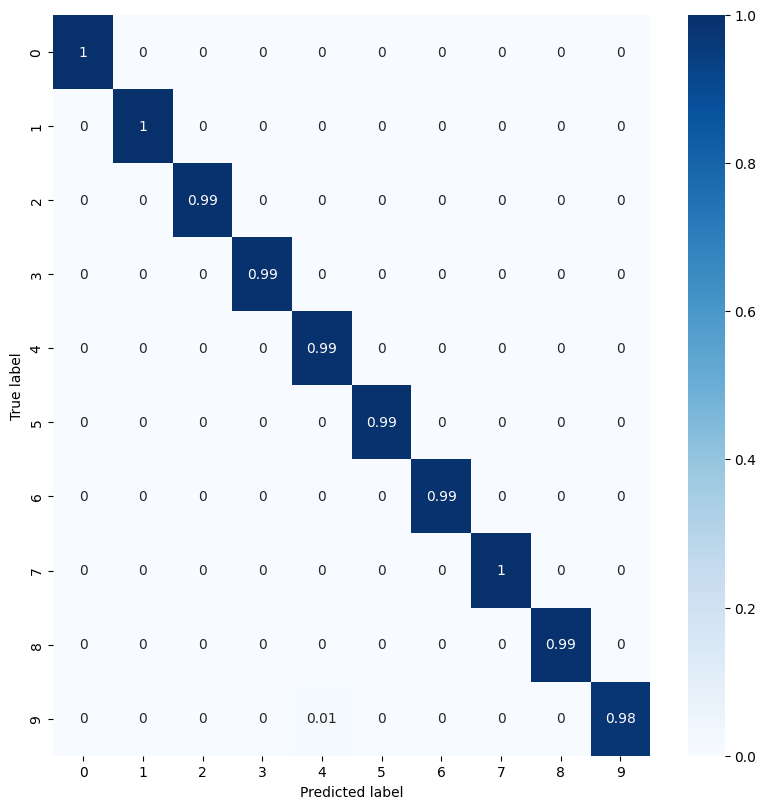

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
def acurracy():
  VP = 0
  VN = 0
  FP = 0
  FN = 0
  for i in range (len(classes)):
    for j in range (len(classes)):
      if i == j:
        if i == 1 and j == 1:
          VP = con_mat[i][j] + VP
        else:
          VN = con_mat[i][j] + VN
      if i < j:
        FP = con_mat[i][j] + FP
      if i > j:
        FN = con_mat[i][j] + FN

  accuracy = (VP + VN) / (VP + VN + FP + FN)
  return accuracy

In [ ]:
print(acurracy())

0.9916


In [ ]:
def sensibility():
  global val_sensibility
  val_sensibility = []
  for i in range (len(classes)):
    VP = 0
    FN = 0
    for j in range (len(classes)):
      if i == j:
        VP = con_mat[i][j] + VP
      if i != j:
        FN = con_mat[i][j] + FN
    sensibility = VP / (VP + FN)
    val_sensibility.append(sensibility)

  sensibility_total = 0 #Initialize sensibility_total before the loop
  for i in range (len(val_sensibility)):
    sensibility_total = val_sensibility[i] + sensibility_total
  sensibility_total = sensibility_total / len(val_sensibility)
  return sensibility_total

In [ ]:
print(sensibility())

0.9914952074120966


In [ ]:
def especificity():
  global val_especificity
  val_especificity = []
  for classe_i in range(len(classes)):
    VN = 0
    FP = 0
    for i in range (len(classes)):
      for j in range (len(classes)):
        if (i > classe_i and j > classe_i) or (i < classe_i and j < classe_i):
          VN = con_mat[i][j] + VN
        elif (j == classe_i and i > classe_i) or (j == classe_i and i < classe_i):
          FP = con_mat[i][j] + FP
    especificity = VN / (VN + FP)
    val_especificity.append(especificity)

  especificity_total = 0 #Initialize especificity_total before the loop
  for i in range (len(val_especificity)):
    especificity_total = val_especificity[i] + especificity_total
  especificity_total = especificity_total / len(val_especificity)
  return especificity_total

In [ ]:
print(especificity())

0.9990652991421005


In [ ]:
def f_score():
  sensibility_total = sensibility()
  especificity_total = especificity()
  f_score = (2 * sensibility_total * especificity_total) / (sensibility_total + especificity_total)
  return f_score

In [ ]:
print(f_score())

0.9952658587664539


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


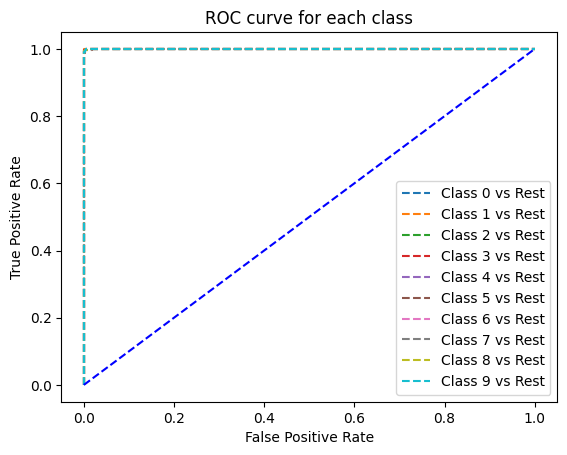

In [ ]:
y_scores = model.predict(test_images) # Predicted Probabilities from the model
y_true_bin = label_binarize(y_true, classes=classes) #Binarize the true labels, for each class

fpr = {}
tpr = {}
thresh = {}

n_classes = len(classes)

for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true_bin[:, i], y_scores[:, i]) #compute fpr, tpr for each class
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest') #plot the roc curve

plt.plot([0,1], [0,1], 'b--') #plot random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for each class')
plt.legend()
plt.show()